In [30]:
import pandas as pd
import os
from pathlib import Path
import sqlalchemy
from sqlalchemy import create_engine
import mysql.connector
from datetime import datetime


In [2]:
#funcion para leer archivos csv  partir de una ruta
def get_data(filepath):
    #manejando los archivos csv y json
    with open(filepath, 'rb') as file:
        # Para importar archivos csv, detectando encoding
        if Path(filepath).suffix == ".csv": 
            df = pd.read_csv(filepath, sep=';')
    return df

In [3]:
def get_nombre_archivo(filepath):
    #leemos el contenido de la ruta 
    archivos = os.listdir(filepath)
    archivos_sin_extension = [os.path.splitext(nombre_archivo)[0] for nombre_archivo in archivos if os.path.splitext(nombre_archivo)[1] in ['.csv','.json'] ]
    return archivos_sin_extension

In [468]:
#creando  los data framees a partir de los nombres que nos dieron
i=1
directorio='./data/'

for nombre_archivo in get_nombre_archivo(directorio):
    locals()['df_'+nombre_archivo[4:]]=get_data(f'{directorio}{nombre_archivo}.csv')
    print(f'el nombre de tu variable {i} es :','df_'+nombre_archivo[4:])
    i+=1

el nombre de tu variable 1 es : df_transacciones
el nombre de tu variable 2 es : df_warehouses
el nombre de tu variable 3 es : df_product_category
el nombre de tu variable 4 es : df_product_product
el nombre de tu variable 5 es : df_product_variant


In [17]:
user='root'
password='20170094'
host='localhost'
database='ecommerce'

In [438]:
con=create_engine(f"mysql+mysqlconnector://{user}:{password}@{host}/{database}")

In [437]:
conexion = mysql.connector.connect(
   host='localhost',
   user='root',
   port=3306,
   passwd='20170094',
   db='ecommerce'
)
cursor = conexion.cursor()

In [325]:
df_warehouses.rename(columns={'warehouse':'id_warehouses'},inplace=True)
df_warehouses

,id_warehouses,latitude,longitude
0,A,-12.0755,-77.0659
1,J,-12.0242,-76.9973
2,G,-12.0445,-76.9373
3,H,-12.1280,-76.9873
4,I,-12.1677,-76.9710
5,K,-12.0678,-76.9381
6,B,-11.9812,-77.0817
7,D,-11.9270,-77.0632
8,L,-12.0242,-76.9142
9,C,-12.0973,-77.0133


### carga de datos df_warehouses

In [ ]:
df_warehouses.to_sql('warehouses', con=con, if_exists='append', index=False)

### carga de datos transacciones

In [412]:
df_transacciones

,month,created,order_id,warehouse,latitude,longitude,delivery_fee
0,9,2021-09-25 16:43:19.418761,103202,A,-12.057617,-77.045541,0.0
1,9,2021-09-16 14:04:00.473244,94707,I,-12.208986,-76.939471,0.0
2,9,2021-09-16 19:14:55.044333,94925,E,-12.086405,-77.094459,0.0
3,9,2021-09-19 04:13:43.047996,96752,I,-12.233908,-76.936294,0.0
4,9,2021-09-01 16:51:57.325185,81009,G,-12.061965,-76.937920,0.0
...,...,...,...,...,...,...,...
15687,11,2021-11-20 07:13:02.203341,125916,H,-12.098605,-76.996828,4.0
15688,11,2021-11-07 05:37:49.305218,119128,F,-12.114078,-77.007178,0.0
15689,11,2021-11-11 02:17:51.447767,120607,A,-12.103490,-77.039591,0.0
15690,11,2021-11-06 07:40:32.429443,118849,F,-12.111779,-77.039683,0.0


In [397]:
'a ,b'.split(',')[0]

'a '

In [413]:
df_transacciones['warehouse']=df_transacciones['warehouse'].apply(lambda x: str(x).split(',')[0].strip())

In [417]:
df_transacciones

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15692 entries, 0 to 15691
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month         15692 non-null  int64  
 1   created       15692 non-null  object 
 2   order_id      15692 non-null  int64  
 3   warehouse     15692 non-null  object 
 4   latitude      15692 non-null  float64
 5   longitude     15692 non-null  float64
 6   delivery_fee  15692 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 858.3+ KB


In [418]:
df_transacciones=df_transacciones.reset_index()

In [419]:
df_transacciones.rename(columns={'index':'id_transacciones','warehouse':'id_warehouses'},inplace=True)

In [421]:
df_transacciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15692 entries, 0 to 15691
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_transacciones  15692 non-null  int64  
 1   month             15692 non-null  int64  
 2   created           15692 non-null  object 
 3   order_id          15692 non-null  int64  
 4   id_warehouses     15692 non-null  object 
 5   latitude          15692 non-null  float64
 6   longitude         15692 non-null  float64
 7   delivery_fee      15692 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 980.9+ KB


In [422]:
df_transacciones.id_warehouses.unique()

array(['A', 'I', 'E', 'G', 'H', 'F', 'K', 'C', 'D', 'J', 'B', 'L', 'nan'],
      dtype=object)

In [423]:
df_transacciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15692 entries, 0 to 15691
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_transacciones  15692 non-null  int64  
 1   month             15692 non-null  int64  
 2   created           15692 non-null  object 
 3   order_id          15692 non-null  int64  
 4   id_warehouses     15692 non-null  object 
 5   latitude          15692 non-null  float64
 6   longitude         15692 non-null  float64
 7   delivery_fee      15692 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 980.9+ KB


In [487]:
df_transacciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15696 entries, 0 to 15695
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_transacciones  15696 non-null  int64  
 1   month             15696 non-null  int64  
 2   created           15696 non-null  object 
 3   order_id          15696 non-null  int64  
 4   id_warehouses     15694 non-null  object 
 5   latitude          15696 non-null  float64
 6   longitude         15696 non-null  float64
 7   delivery_fee      15696 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 981.1+ KB


In [ ]:
df_transacciones.to_sql('transacciones', con=con, if_exists='append', index=False)

### Implementacion de algoritmo que permite normalizar la data si este tiene diferentes almacenes de partida

In [469]:
df_transacciones.rename(columns={'warehouse':'id_warehouses'},inplace=True)

In [470]:
df_transacciones.id_warehouses.unique()

array(['A', 'I', 'E', 'G', 'H', 'F', 'K', 'C', 'D', 'J', 'B', 'L', 'A,E',
       'F,H', nan], dtype=object)

In [471]:
demo=df_transacciones[df_transacciones.id_warehouses.isin(['A,E','F,H'])].copy()

In [472]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 6555 to 14439
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          4 non-null      int64  
 1   created        4 non-null      object 
 2   order_id       4 non-null      int64  
 3   id_warehouses  4 non-null      object 
 4   latitude       4 non-null      float64
 5   longitude      4 non-null      float64
 6   delivery_fee   4 non-null      float64
dtypes: float64(3), int64(2), object(2)
memory usage: 256.0+ bytes


In [473]:
def normalizacion_data(data):
    df_normalizado = data.drop(data.index)
    for idx in data.index:
        df = demo.loc[idx, :]
        warehouses = df.id_warehouses.split(',')
        for info in range(len(warehouses)):
            aux = df.copy()
            aux=aux.to_frame().T
            aux['id_warehouses'] = str(warehouses[info])
            aux=pd.DataFrame(aux)
            df_normalizado=pd.concat([df_normalizado,aux], ignore_index=True)
    return df_normalizado


In [474]:
demo=normalizacion_data(demo)

In [475]:
# Convertir columnas a tipos de datos deseados
demo['month'] = pd.to_numeric(demo['month'], errors='coerce')
demo['order_id'] = pd.to_numeric(demo['order_id'], errors='coerce')
demo['latitude'] = pd.to_numeric(demo['latitude'], errors='coerce')
demo['longitude'] = pd.to_numeric(demo['longitude'], errors='coerce')
demo['delivery_fee'] = pd.to_numeric(demo['delivery_fee'], errors='coerce')

print(demo.dtypes)

month              int64
created           object
order_id           int64
id_warehouses     object
latitude         float64
longitude        float64
delivery_fee     float64
dtype: object


In [476]:
demo

,month,created,order_id,id_warehouses,latitude,longitude,delivery_fee
0,9,2021-09-01 13:27:32.540497,80869,A,-12.062288,-77.094423,0.0
1,9,2021-09-01 13:27:32.540497,80869,E,-12.062288,-77.094423,0.0
2,10,2021-10-18 11:22:30.818788,112259,F,-12.136385,-77.001616,6.0
3,10,2021-10-18 11:22:30.818788,112259,H,-12.136385,-77.001616,6.0
4,10,2021-10-30 12:12:49.456198,116939,F,-12.068146,-77.018158,0.0
5,10,2021-10-30 12:12:49.456198,116939,H,-12.068146,-77.018158,0.0
6,11,2021-11-30 12:24:37.18634,132429,A,-12.075654,-77.074720,0.0
7,11,2021-11-30 12:24:37.18634,132429,E,-12.075654,-77.074720,0.0


In [477]:
df_transacciones.drop(index=df_transacciones.loc[df_transacciones['id_warehouses'].isin(['A,E','F,H'])].index, inplace=True)

In [478]:
df_transacciones=pd.concat([df_transacciones,demo], ignore_index=True)

In [479]:
df_transacciones.reset_index(inplace=True)

In [480]:
df_transacciones.rename(columns={'index':'id_transacciones'},inplace=True)

In [481]:
df_transacciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15696 entries, 0 to 15695
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_transacciones  15696 non-null  int64  
 1   month             15696 non-null  int64  
 2   created           15696 non-null  object 
 3   order_id          15696 non-null  int64  
 4   id_warehouses     15694 non-null  object 
 5   latitude          15696 non-null  float64
 6   longitude         15696 non-null  float64
 7   delivery_fee      15696 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 981.1+ KB


In [482]:
df_transacciones.head()

,id_transacciones,month,created,order_id,id_warehouses,latitude,longitude,delivery_fee
0,0,9,2021-09-25 16:43:19.418761,103202,A,-12.057617,-77.045541,0.0
1,1,9,2021-09-16 14:04:00.473244,94707,I,-12.208986,-76.939471,0.0
2,2,9,2021-09-16 19:14:55.044333,94925,E,-12.086405,-77.094459,0.0
3,3,9,2021-09-19 04:13:43.047996,96752,I,-12.233908,-76.936294,0.0
4,4,9,2021-09-01 16:51:57.325185,81009,G,-12.061965,-76.937920,0.0


In [483]:
df_transacciones.to_sql('transacciones', con=con, if_exists='append', index=False)

15696

In [45]:
def tranformacion_fecha(fecha):
    fecha = datetime.strptime(fecha, '%Y-%m-%d %H:%M:%S.%f')
    new_format = "%Y-%m-%d"
    fecha = fecha.strftime(new_format)
    return fecha

In [46]:
date='2021-09-25 16:43:19.418761'	

In [496]:
# Graficar en mapa con latitud y longitud
import geopandas as gpd                     
from geopandas import GeoDataFrame
from shapely.geometry import Point
import matplotlib.colors as colors
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

In [530]:
dt_ini_con=pd.read_csv('./data/ej1_warehouses.csv',sep=';')

In [500]:
dt_ini_con

,warehouse,latitude,longitude
0,A,-12.0755,-77.0659
1,J,-12.0242,-76.9973
2,G,-12.0445,-76.9373
3,H,-12.1280,-76.9873
4,I,-12.1677,-76.9710
5,K,-12.0678,-76.9381
6,B,-11.9812,-77.0817
7,D,-11.9270,-77.0632
8,L,-12.0242,-76.9142
9,C,-12.0973,-77.0133


C:\Users\carlo\AppData\Local\Temp\ipykernel_10568\2356630948.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


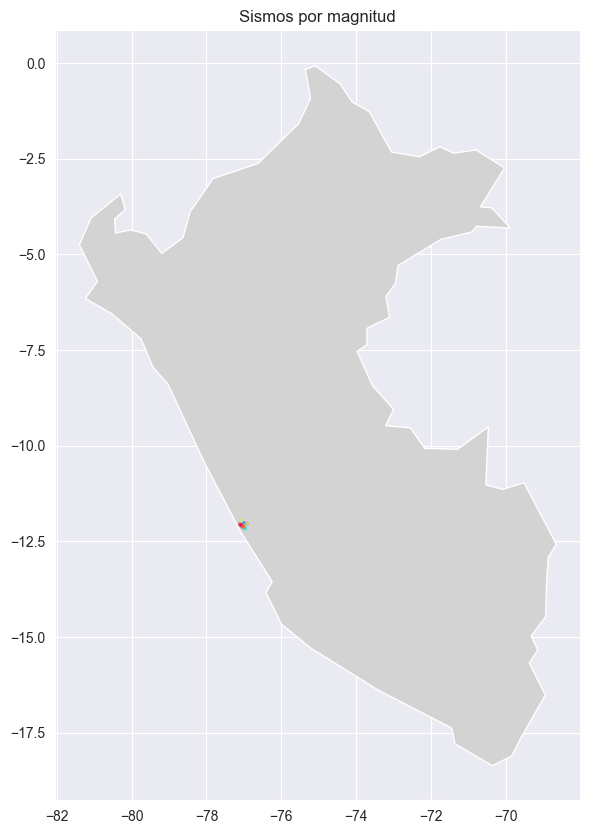

In [531]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Cargamos el mapa mundial
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filtramos para obtener el mapa de Perú
peru = world[world['name'] == 'Peru']

# Creamos el objeto GeoDataFrame
crs = 'EPSG:4326'
geometry = [Point(xy) for xy in zip(dt_ini_con['longitude'], dt_ini_con['latitude'])]
geo_df = gpd.GeoDataFrame(dt_ini_con, crs=crs, geometry=geometry)

# Por magnitud
fig, ax = plt.subplots(figsize=(12, 10))

peru.plot(ax=ax, color='lightgrey')

geo_df.plot(ax=ax, cmap='rainbow', legend=True, legend_kwds={'shrink': 0.3},
            markersize=5, alpha=0.5)

ax.set_title('Sismos por magnitud')
plt.show()


C:\Users\carlo\AppData\Local\Temp\ipykernel_10568\991550805.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


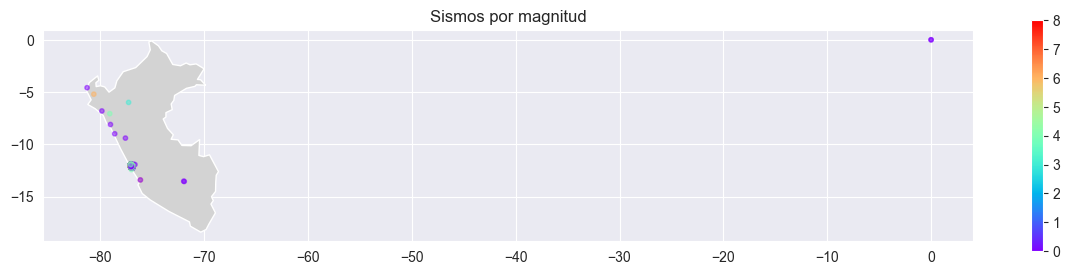

In [529]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Cargamos el mapa mundial
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filtramos para obtener el mapa de Perú
peru = world[world['name'] == 'Peru']

# Creamos el objeto GeoDataFrame
crs = 'EPSG:4326'
geometry = [Point(xy) for xy in zip(dt_ini_con['longitude'], dt_ini_con['latitude'])]
geo_df = gpd.GeoDataFrame(dt_ini_con, crs=crs, geometry=geometry)

# Por magnitud
fig, ax = plt.subplots(figsize=(15,15))

peru.plot(ax=ax, color='lightgrey')

geo_df.plot(column = 'delivery_fee',ax=ax, cmap='rainbow', legend=True, legend_kwds={'shrink': 0.2},
            markersize=10, alpha=0.5)

ax.set_title('Sismos por magnitud')
plt.show()